# Exploring Filipino Family Income and Expenditure

### Members:
- Fernando Magallenes Jr.
- Heinze Kristian Moneda
- Azriel Matthew Ortega
- Caleb James Sonoy
- Darren Tan

## Introduction
Socioeconomic status refers to the position of a certain individual or group of people which is based on the combination of different economic factors such as income and expenditures (American Psychological Association, 2015a). In order to assess the socioeconomic status of person or group, survey questionnaires are usually done to get specific information such as educational attainment, income, occupation, family size, and relationships (American Psychological Association, 2015b). In the Philippines collecting this kind of data is done through the Family Income and Expenditure Survey (FIES) conducted by the Philippine Statistics Authority (PSA) .

Assessing socioeconomic status in the Philippines, however is more difficult as there is no standard SEC models. But with the data collected from the FIES, It can provide the necessary information in order for the government to create policies regarding the socioeconomic status in the country (Philippines Statistics Authority, 2018).

### Project Objectives
As such, this project aims to do the following:
- Perform exploratory data analysis on the different variables of dataset
- Identify the different factors affecting the household income of Filipino families
- Visualize data and get insights based on the analysis performed.

## The Dataset
In this project, we will explore the dataset called `Filipino Family Income and Expenditure`, which contains different information about the household income and expenditure of Filipino families on the different regions in the Philippines. The dataset is provided by the Philippine Statistics Authority (PSA) through their Family Income and Expenditure Survey (FIES). This survey is done every 3 years with its goal of provided data regarding the income and expenditure of Filipino families, and other information related on how these incomes are affected by other factors. The source of this dataset can be found on https://www.kaggle.com/grosvenpaul/family-income-and-expenditure

### Format
The format of the dataset to be use in this project is in `.csv` format

### Process of Data Collection
According to the [Philippine Statistics Authority](https://psa.gov.ph/sites/default/files/FIES%202018%20Final%20Report.pdf), the data is collected through an interview in two different segments using the same questionnaire. Collection for the first segment was done from January 01, 2018 to June 30, 2018. The second segment on the other hand was collected from July 01, 2018 to December 31, 2018. 

### Dataset Content
Upon opening, the dataset contains **40,000** observations and **60** variables.

The **variables** of the dataset are as follows:
- **Total Household Income**: Total household income, in Philippine peso.
- **Region** : Region in the Philippines where the household is located.
- **Total Food Expenditure** : Total food expenditure of the household.
- **Main Source of Income** : Main source of income of the household.
- **Agricultural Household indicator** : Agricultural household indicator.
- **Bread and Cereals Expenditure** : Bread and cereals expenditure of the household, in Philippine peso.
- **Total Rice Expenditure**: Total rice expenditure of the household, in Philippine peso.
- **Meat Expenditure** : Meat expenditure of the household, in Philippine peso.
- **Total Fish and marine products Expenditure** : Total fish and marine products expenditure of the household, in Philippine peso.
- **Fruit Expenditure** : Fruit expenditure of the household, in Philippine peso.
- **Vegetables Expenditure** : Vegetables expenditure of the household, in Philippine peso.
- **Restaurant and hotels Expenditure** : Restaurant and hotels expenditure of the household, in Philippine peso.
- **Alcoholic Beverages Expenditure**: Alcoholic beverages expenditure of the household, in Philippine peso.
- **Tobacco Expenditure** : Tobacco expenditure of the household, in Philippine peso.
- **Clothing, Footwear and Other Wear Expenditure** : Clothing, footwear and other wear expenditure of the household, in Philippine peso.
- **Housing and water Expenditure** : Housing and water expenditure of the household, in Philippine peso.
- **Imputed House Rental Value** : Imputed house rental value of the household, in Philippine peso.
- **Medical Care Expenditure** : Medical care expenditure of the household, in Philippine peso.
- **Transportation Expenditure** : Transportation expenditure of the household, in Philippine peso.
- **Communication Expenditure** : Communication expenditure of the household, in Philippine peso.
- **Education Expenditure** : Education expenditure of the household, in Philippine peso.
- **Miscellaneous Goods and Services Expenditure** : Miscellaneous goods and services expenditure of the household, in Philippine peso.
- **Special Occasions Expenditure** : Special occasions expenditure of the household, in Philippine peso.
- **Crop Farming and Gardening expenses** : Crop farming and gardening expenses of the household, in Philippine peso.
- **Total Income from Entrepreneurial Acitivites** : Total income from entrepreneurial activites of the household, in Philippine peso.
- **Household Head Sex** : Household head sex.
- **Household Head Age**: Household head age.
- **Household Head Marital Status** : Household head marital status
- **Household Head Highest Grade Completed** : Household head highest grade completed.
- **Household Head Job or Business Indicator** : Household head job or business indicator.
- **Household Head Occupation** : Household head occupation
- **Household Head Class of Worker** : Household head class of worker
- **Type of Household** : Type of household.
- **Total Number of Family members** : Total number of family members.
- **Members with age less than 5 year old** : Members with age less than 5 years old.
- **Members with age 5 - 17 years old** : Members with age 5 - 17 years old.
- **Total number of family members employed** : Total number of family members employed.
- **Type of Building/House** : Type of building/ house.
- **Type of Roof** : Type of roof.
- **Type of Walls** : Type of walls.
- **House Floor Area** : House floor area.
- **House Age** : House age.
- **Number of bedrooms**: Number of bedrooms.
- **Tenure Status**: Tenure status.
- **Toilet Facilities** : Toilet facilities.
- **Electricity** : Electricity.
- **Main Source of Water Supply** : Main source of water supply.
- **Number of Television** : Number of television.
- **Number of CD/VCD/DVD** : Number of CD/ VCD/ DVD.
- **Number of Component/Stereo set** : Number of component/ stereo set.
- **Number of Refrigerator/Freezer** : Number of refrigerator/ freezer.
- **Number of Washing Machine** : Number of washing machine.
- **Number of Airconditioner** : Number of air conditioner.
- **Number of Car, Jeep, Van** : Number of car, jeep, van.
- **Number of Landline/wireless telephones** : Number of landline/ wireless telephones.
- **Number of Cellular phone** : Number of cellular phone.
- **Number of Personal Computer** : Number of personal computer.
- **Number of Stove with Oven/Gas Range** : Number of stove with oven/ gas range.
- **Number of Motorized Banca** : Number of motorized banca.
- **Number of Motorcycle/Tricycle** : Number of motorcycle/ tricycle.

## Importing Libraries

In order to analyze the dataset the following modules are required to be imported in python.

- numpy is a library made up of multidimensional array objects and a collection of routines for processing those arrays.
- pandas is a software library for Python that is designed for data manipulation and data analysis.
- matplotlib is a software libary for data visualization, which allows us to easily render various types of graphs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

## Importing the Dataset

First step is to load the dataset using the pandas library. To load the dataset into a pandas Dataframe object, we call the `read_csv` function. The arguments needed for the function is the path to the csv file.

In [2]:
income_df = pd.read_csv("Family Income and Expenditure.csv")

In [3]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

## Exploratory Data Analysis

In [4]:
income_df.shape

(41544, 60)

In [5]:
quant_income_df = income_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
for col in quant_income_df.columns:
    print(f"{col}")

Total Household Income
Total Food Expenditure
Agricultural Household indicator
Bread and Cereals Expenditure
Total Rice Expenditure
Meat Expenditure
Total Fish and  marine products Expenditure
Fruit Expenditure
Vegetables Expenditure
Restaurant and hotels Expenditure
Alcoholic Beverages Expenditure
Tobacco Expenditure
Clothing, Footwear and Other Wear Expenditure
Housing and water Expenditure
Imputed House Rental Value
Medical Care Expenditure
Transportation Expenditure
Communication Expenditure
Education Expenditure
Miscellaneous Goods and Services Expenditure
Special Occasions Expenditure
Crop Farming and Gardening expenses
Total Income from Entrepreneurial Acitivites
Household Head Age
Total Number of Family members
Members with age less than 5 year old
Members with age 5 - 17 years old
Total number of family members employed
House Floor Area
House Age
Number of bedrooms
Electricity
Number of Television
Number of CD/VCD/DVD
Number of Component/Stereo set
Number of Refrigerator/Freez

In [6]:
qual_income_df = income_df.select_dtypes(include=['object'])
for col in qual_income_df.columns:
    print(f"{col}")

Region
Main Source of Income
Household Head Sex
Household Head Marital Status
Household Head Highest Grade Completed
Household Head Job or Business Indicator
Household Head Occupation
Household Head Class of Worker
Type of Household
Type of Building/House
Type of Roof
Type of Walls
Tenure Status
Toilet Facilities
Main Source of Water Supply


There are 41544 instances of the dataset with 60 features, 15 of which are qualitative features while the 45 are quantitative.

<i>Qualitative</i> : Region,Main Source of Income,Household Head Sex,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Type of Building/House,Type of Roof,Type of Walls,Tenure Status,Toilet Facilities,Main Source of Water Supply,
income_df.describe()

<i>Quantitative</i>: Total Household Income, Total Food Expenditure, Agricultural Household indicator, Bread and Cereals Expenditure, Total Rice Expenditure, Meat Expenditure, Total Fish and  marine products Expenditure, Fruit Expenditure, Vegetables Expenditure, Restaurant and hotels Expenditure, Alcoholic Beverages Expenditure, Tobacco Expenditure, Clothing, Footwear and Other Wear Expenditure, Housing and water Expenditure, Imputed House Rental Value, Medical Care Expenditure, Transportation Expenditure, Communication Expenditure, Education Expenditure, Miscellaneous Goods and Services Expenditure, Special Occasions Expenditure, Crop Farming and Gardening expenses, Total Income from Entrepreneurial Acitivites, Household Head Age, Total Number of Family members, Members with age less than 5 year old, Members with age 5 - 17 years old, Total number of family members employed, House Floor Area, House Age, Number of bedrooms, Electricity, Number of Television, Number of CD/VCD/DVD, Number of Component/Stereo set, Number of Refrigerator/Freezer, Number of Washing Machine, Number of Airconditioner, Number of Car, Jeep, Van, Number of Landline/wireless telephones, Number of Cellular phone, Number of Personal Computer, Number of Stove with Oven/Gas Range, Number of Motorized Banca, Number of Motorcycle/Tricycle

In [7]:
income_df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


### `Total Household Income`

In [8]:
y = income_df['Total Household Income']
y.describe().round(2)

count       41544.00
mean       247555.58
std        286880.52
min         11285.00
25%        104895.00
50%        164079.50
75%        291138.50
max      11815988.00
Name: Total Household Income, dtype: float64

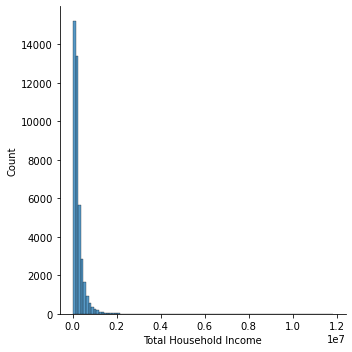

In [9]:
sns.displot(y, bins=100)

### `Total Income from Entrepreneurial Activities`

In [10]:
y = income_df["Total Income from Entrepreneurial Acitivites"]
y.describe().round(2)

count      41544.00
mean       54376.24
std       147142.79
min            0.00
25%            0.00
50%        19222.00
75%        65968.75
max      9234485.00
Name: Total Income from Entrepreneurial Acitivites, dtype: float64

### `Household Head - Age`

In [11]:
y = income_df["Household Head Age"]
y.describe()

count    41544.000000
mean        51.381451
std         14.166081
min          9.000000
25%         41.000000
50%         51.000000
75%         61.000000
max         99.000000
Name: Household Head Age, dtype: float64

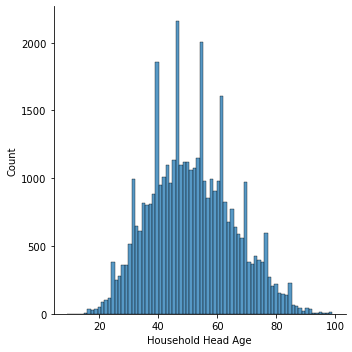

In [12]:
sns.displot(y)

### `Household Head - Sex`

In [13]:
y = income_df["Household Head Sex"]
y.value_counts()

Male      32483
Female     9061
Name: Household Head Sex, dtype: int64

<AxesSubplot:>

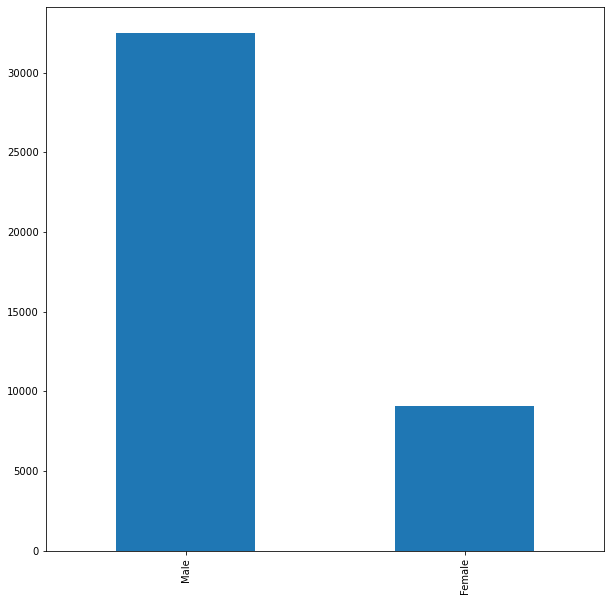

In [14]:
y.value_counts().plot.bar(figsize=(10,10))

### `Household Head - Marital Status`

In [15]:
y = income_df["Household Head Marital Status"]
y.value_counts()

Married               31347
Widowed                6818
Single                 1942
Divorced/Separated     1425
Annulled                 11
Unknown                   1
Name: Household Head Marital Status, dtype: int64

<AxesSubplot:>

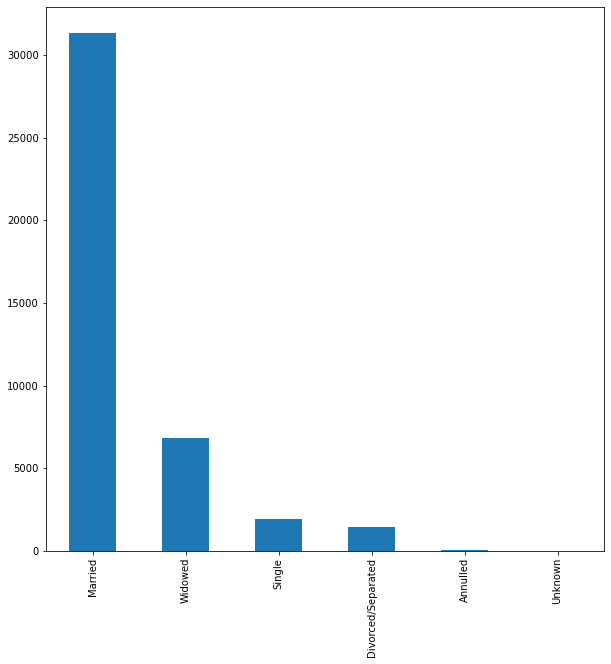

In [16]:
y.value_counts().plot.bar(figsize=(10,10))

### `Household Head - Highest Grade Completed`

In [17]:
y = income_df["Household Head Highest Grade Completed"]
y.value_counts().nlargest(10)

High School Graduate                    9628
Elementary Graduate                     7640
Grade 4                                 2282
Grade 5                                 2123
Second Year High School                 2104
Grade 3                                 1994
Third Year High School                  1545
Business and Administration Programs    1344
Second Year College                     1343
Grade 2                                 1311
Name: Household Head Highest Grade Completed, dtype: int64

<AxesSubplot:>

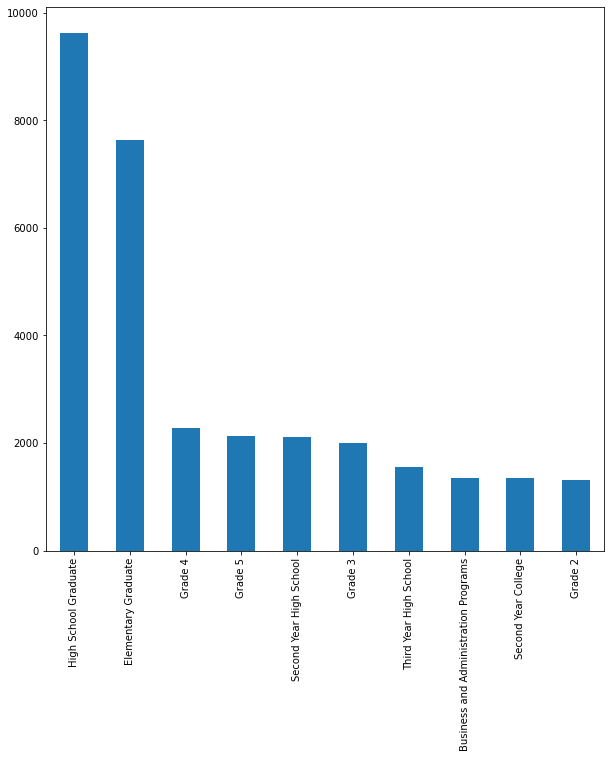

In [18]:
y.value_counts().nlargest(10).plot.bar(figsize=(10,10))

### `Household Head - Job or Business Indicator`

In [19]:
y = income_df["Household Head Job or Business Indicator"]
y.value_counts()

With Job/Business    34008
No Job/Business       7536
Name: Household Head Job or Business Indicator, dtype: int64

<AxesSubplot:>

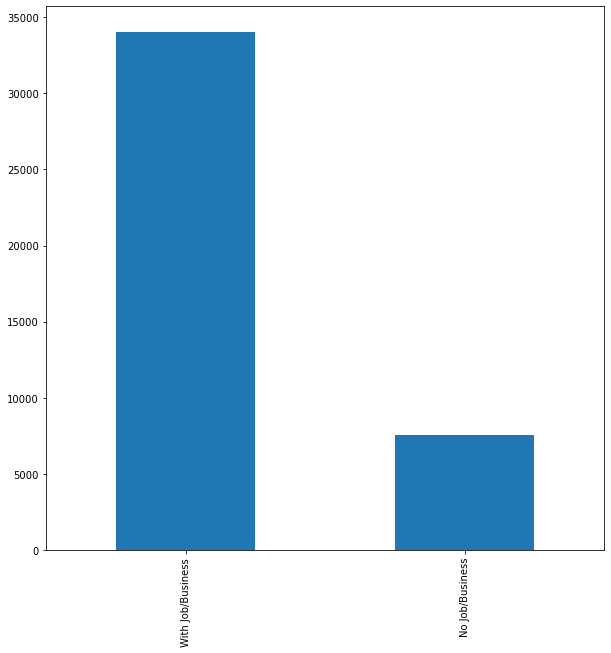

In [20]:
y.value_counts().plot.bar(figsize=(10,10))

### `Household Head - Occupation`

In [21]:
y = income_df["Household Head Occupation"]
y.value_counts().nlargest(10)

Farmhands and laborers                                                                 3478
Rice farmers                                                                           2849
General managers/managing proprietors in wholesale and retail trade                    2028
General managers/managing proprietors in transportation, storage and communications    1932
Corn farmers                                                                           1724
Coconut farmers                                                                        1036
Building construction laborers                                                         1014
Inland and coastal waters fishermen                                                    1011
Carpenters and joiners                                                                 1000
Car, taxi and van drivers                                                               824
Name: Household Head Occupation, dtype: int64

<AxesSubplot:>

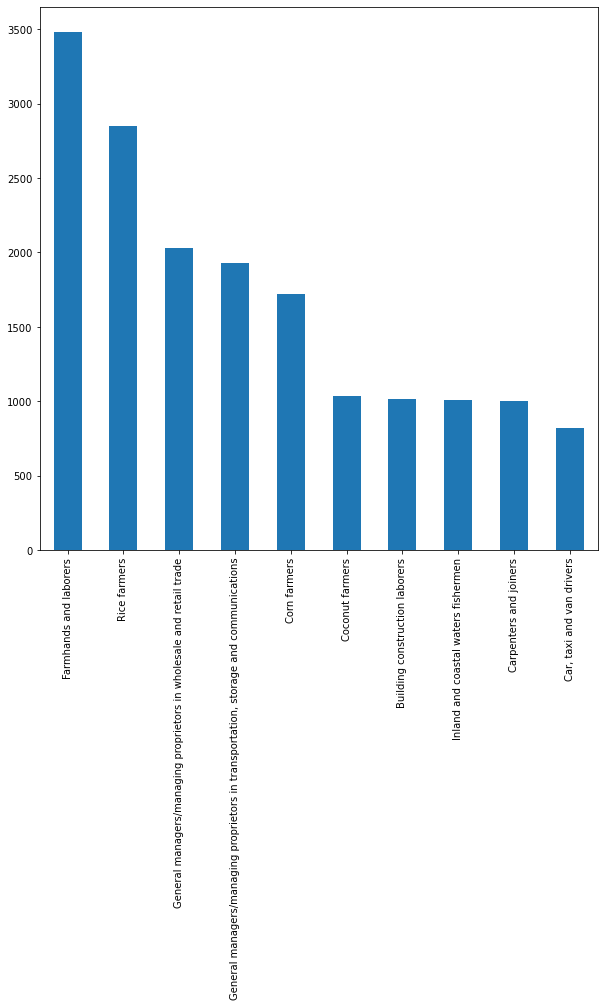

In [22]:
y.value_counts().nlargest(10).plot.bar(figsize=(10,10))

### `Household Head - Class of Worker`

In [23]:
y = income_df["Household Head Class of Worker"]
y.value_counts()

Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: Household Head Class of Worker, dtype: int64

<AxesSubplot:>

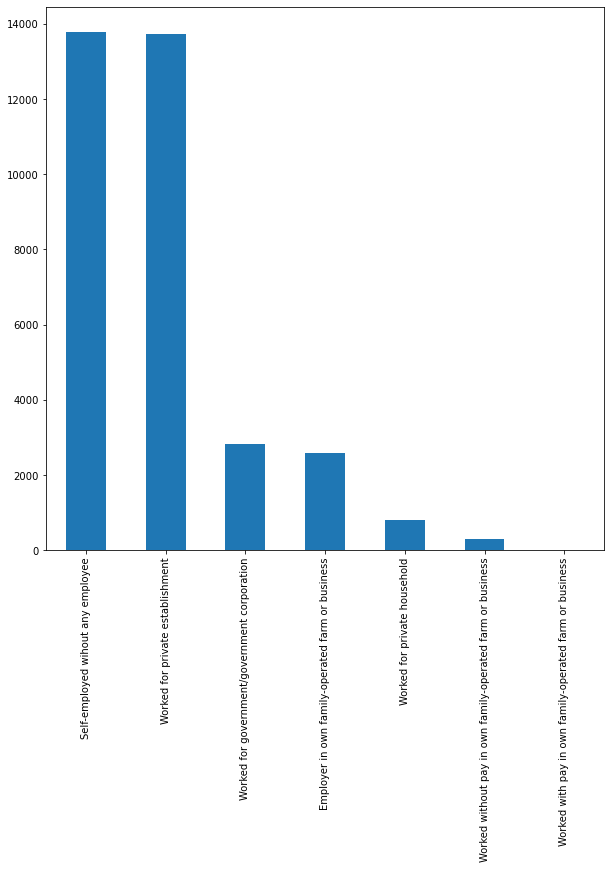

In [24]:
y.value_counts().plot.bar(figsize=(10,10))

### `Total Number of Family members`

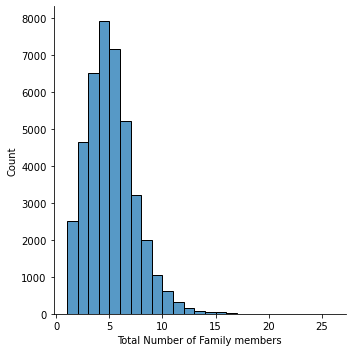

In [25]:
y = income_df["Total Number of Family members"]
sns.displot(y, bins = 25)

In [26]:
y.describe()

count    41544.000000
mean         4.635182
std          2.280252
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         26.000000
Name: Total Number of Family members, dtype: float64

### `Total Number of Family members employed`

In [27]:
y = income_df["Total number of family members employed"]
y.value_counts()

1    15312
0    11494
2     9303
3     3579
4     1280
5      415
6      116
7       33
8       12
Name: Total number of family members employed, dtype: int64

In [28]:
y.describe()

count    41544.000000
mean         1.272699
std          1.149152
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Total number of family members employed, dtype: float64

<AxesSubplot:>

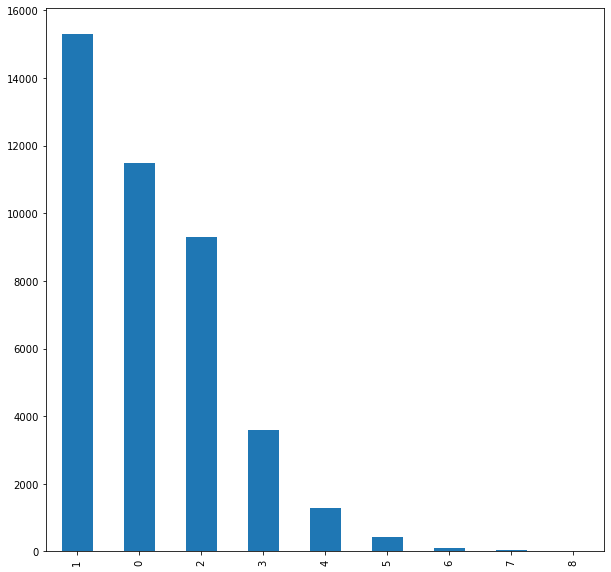

In [29]:
y.value_counts().plot.bar(figsize=(10,10))

### `Agricultural Household indicator`

In [30]:
y = income_df['Agricultural Household indicator']
y.unique()

array([0, 1, 2], dtype=int64)

In [31]:
y.value_counts()

0    28106
1     9018
2     4420
Name: Agricultural Household indicator, dtype: int64

<AxesSubplot:>

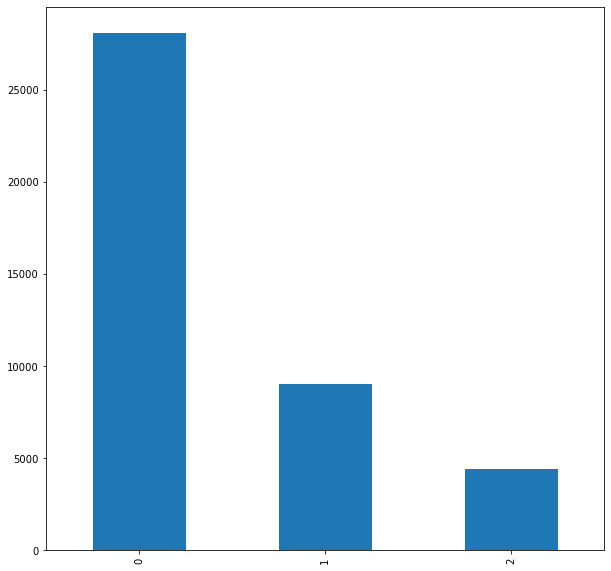

In [32]:
y.value_counts().plot.bar(figsize=(10,10))

### `Expenditures`

In [33]:
expenditures_df = income_df.filter(regex='Expenditure')
expenditures_df

,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure
0,117848,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,3457,4776,2880,36200,34056,7200
1,67766,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,3520,12900,5700,29300,9150,1500
2,61609,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,70,324,420,425,6450,500
3,78189,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,60,6840,660,300,3762,500
4,94625,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,140,6996,2100,0,8472,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,44875,23675,21542,1476,6120,1632,3882,1805,0,133,1395,18372,294,2124,600,50,3978,2500
41540,31157,2691,1273,1886,4386,1840,3110,9090,0,300,3136,17640,890,2568,1560,1550,6090,1500
41541,45882,28646,27339,480,4796,1232,3025,3330,0,0,2460,9240,540,2040,1080,0,3570,500
41542,81416,29996,26655,2359,17730,2923,7951,13660,0,630,3755,12438,314,2412,1020,5295,5760,1000


In [34]:
expenditures_sum = expenditures_df.sum()
expenditures_sum.nlargest(10)

Total Food Expenditure                          3535359428
Housing and water Expenditure                   1594270434
Bread and Cereals Expenditure                   1044155415
Total Rice Expenditure                           755927354
Restaurant and hotels Expenditure                641296701
Miscellaneous Goods and Services Expenditure     520216944
Transportation Expenditure                       490482774
Meat Expenditure                                 437876775
Total Fish and  marine products Expenditure      437430001
Education Expenditure                            310479104
dtype: int64

<AxesSubplot:ylabel='None'>

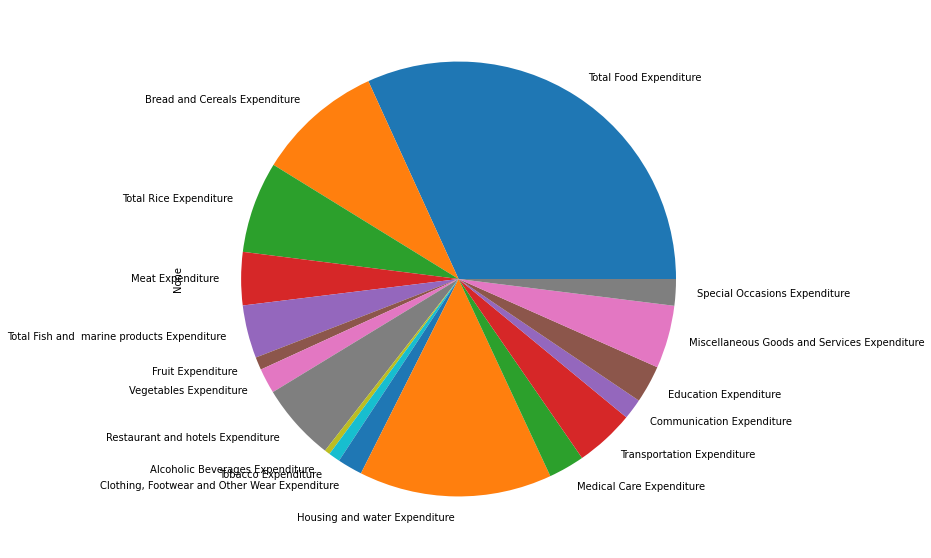

In [35]:
expenditures_sum.plot.pie(figsize=(10,10))

In [36]:
print(f"Highest expenditure is {expenditures_sum.idxmax()} with total of {expenditures_sum.max()} pesos")
print(f"Lowest expenditure is {expenditures_sum.idxmin()} with total of {expenditures_sum.min()} pesos")

Highest expenditure is Total Food Expenditure with total of 3535359428 pesos
Lowest expenditure is Alcoholic Beverages Expenditure with total of 45078070 pesos


<AxesSubplot:>

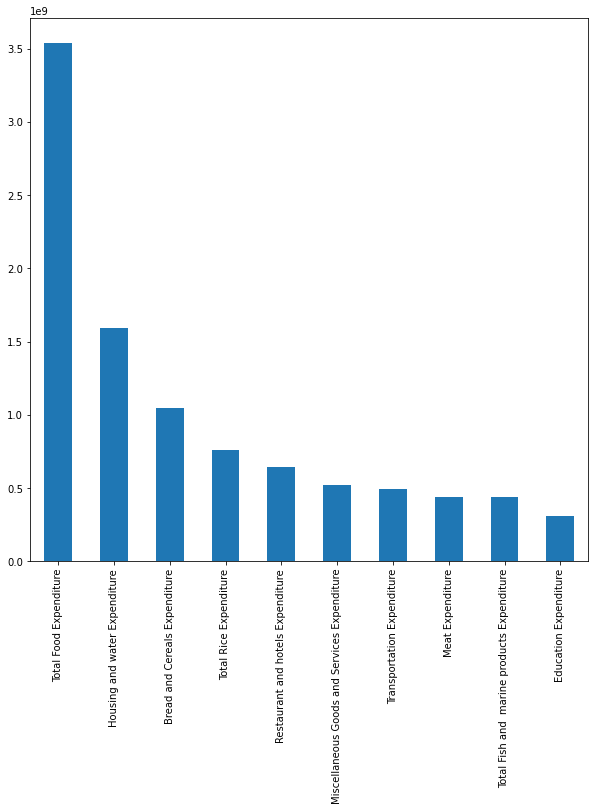

In [37]:
expenditures_sum.nlargest(10).plot.bar(figsize=(10,10))

### `Type of Household`

In [38]:
y = income_df['Type of Household']
y.value_counts()

Single Family                             28445
Extended Family                           12932
Two or More Nonrelated Persons/Members      167
Name: Type of Household, dtype: int64

<AxesSubplot:>

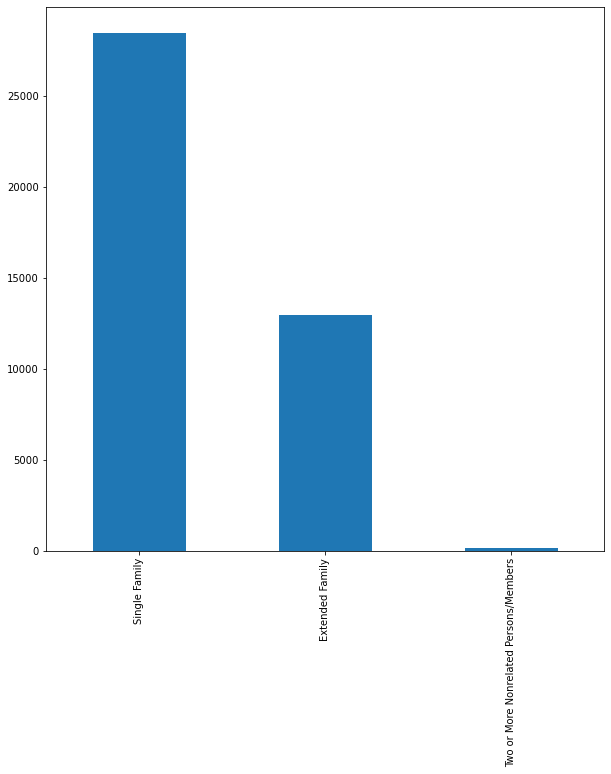

In [39]:
y.value_counts().plot.bar(figsize=(10,10))

### `Type of Building/House`

In [40]:
y = income_df['Type of Building/House']
y.value_counts()

Single house                                   39069
Multi-unit residential                          1329
Duplex                                          1084
Commercial/industrial/agricultural building       51
Institutional living quarter                       9
Other building unit (e.g. cave, boat)              2
Name: Type of Building/House, dtype: int64

<AxesSubplot:>

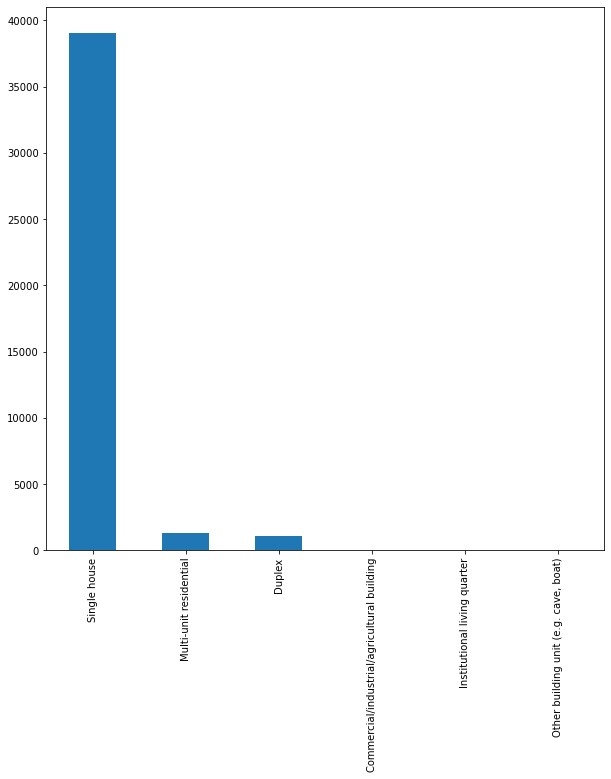

In [41]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Bedrooms`

In [42]:
y = income_df['Number of bedrooms']
y.value_counts()

2    15456
1    13431
3     6111
0     3930
4     1875
5      484
6      169
7       46
8       29
9       13
Name: Number of bedrooms, dtype: int64

<AxesSubplot:>

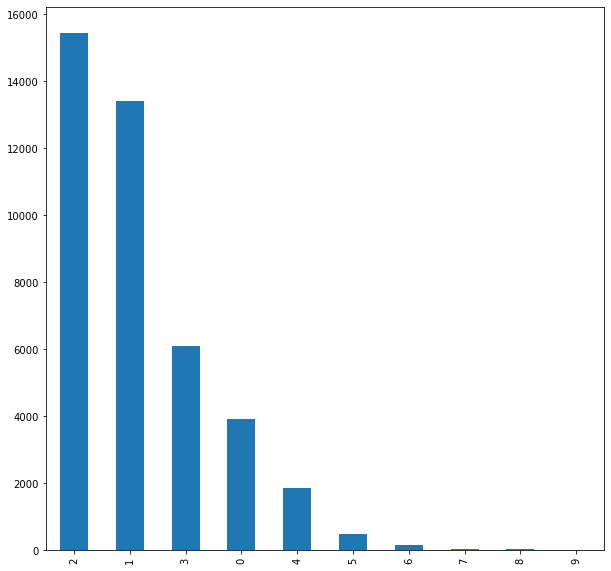

In [43]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Television`

In [44]:
y = income_df['Number of Television']
y.value_counts()

1    27089
0    10717
2     2955
3      597
4      133
5       42
6       11
Name: Number of Television, dtype: int64

<AxesSubplot:>

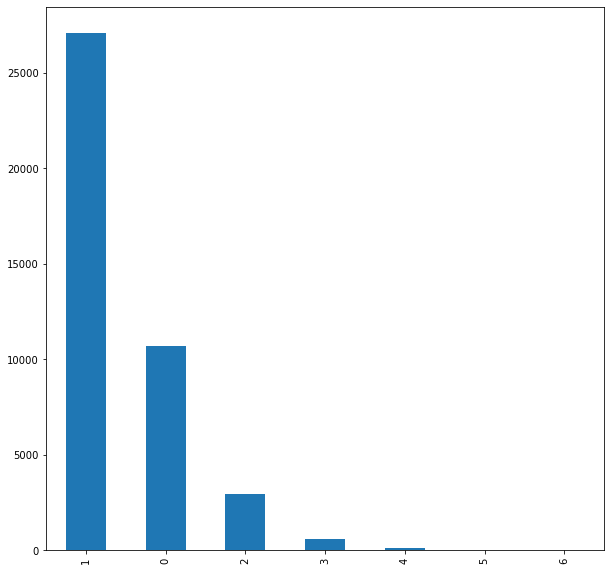

In [45]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of CD/VCD/DVD`

In [46]:
y = income_df['Number of CD/VCD/DVD']
y.value_counts()

0    24621
1    15983
2      752
3      163
4       20
5        5
Name: Number of CD/VCD/DVD, dtype: int64

<AxesSubplot:>

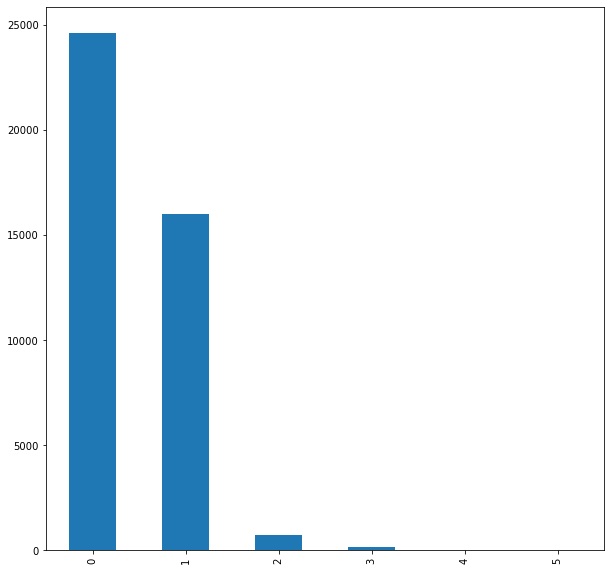

In [47]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Component/Stereo set`

In [48]:
y = income_df['Number of Component/Stereo set']
y.value_counts()

0    35058
1     6284
2      174
3       13
4       10
5        5
Name: Number of Component/Stereo set, dtype: int64

<AxesSubplot:>

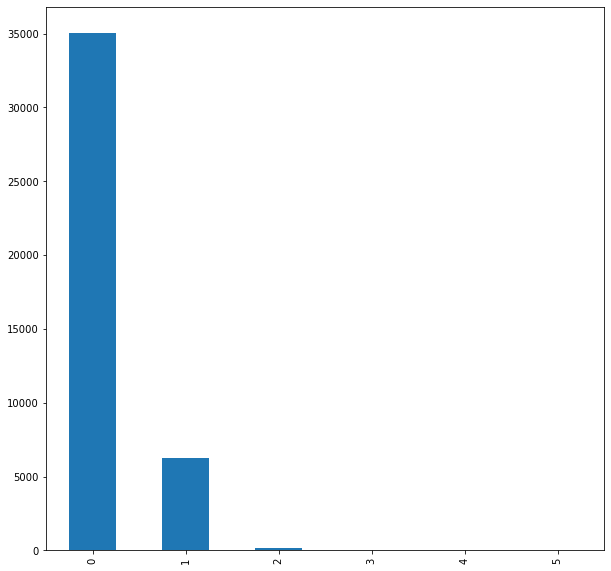

In [49]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Refrigerator/Freezer`

In [50]:
y = income_df['Number of Refrigerator/Freezer']
y.value_counts()

0    25990
1    14881
2      569
3       73
4       17
5       14
Name: Number of Refrigerator/Freezer, dtype: int64

<AxesSubplot:>

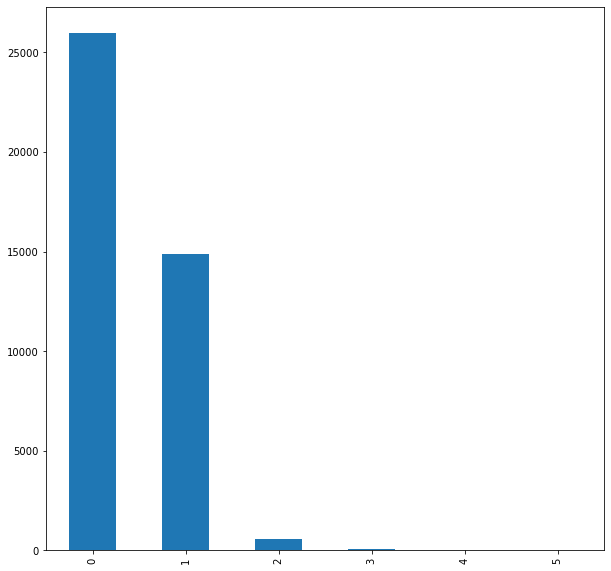

In [51]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Washing Machine`

In [52]:
y = income_df['Number of Washing Machine']
y.value_counts()

0    28484
1    12845
2      204
3       11
Name: Number of Washing Machine, dtype: int64

<AxesSubplot:>

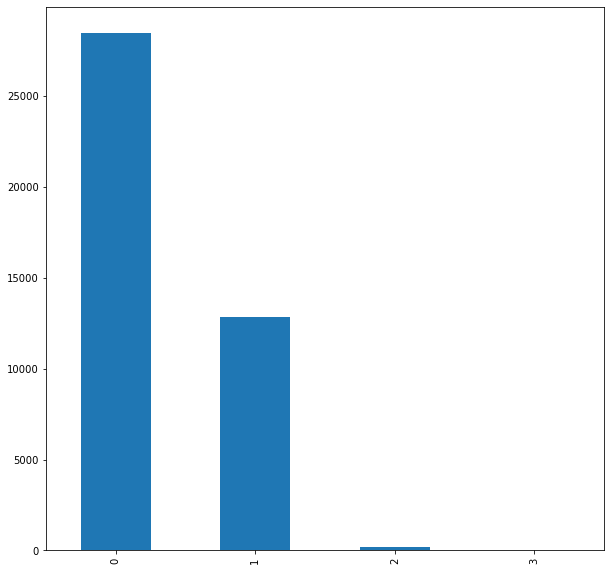

In [53]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Airconditioner`

In [54]:
y = income_df['Number of Airconditioner']
y.value_counts()

0    37457
1     3178
2      622
3      199
4       66
5       22
Name: Number of Airconditioner, dtype: int64

<AxesSubplot:>

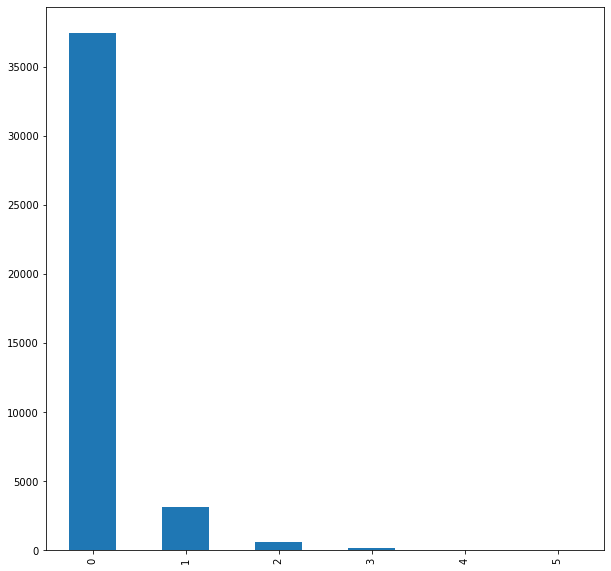

In [55]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Car, Jeep, Van`

In [56]:
y = income_df['Number of Car, Jeep, Van']
y.value_counts()

0    38876
1     2136
2      413
3       77
4       29
5       13
Name: Number of Car, Jeep, Van, dtype: int64

<AxesSubplot:>

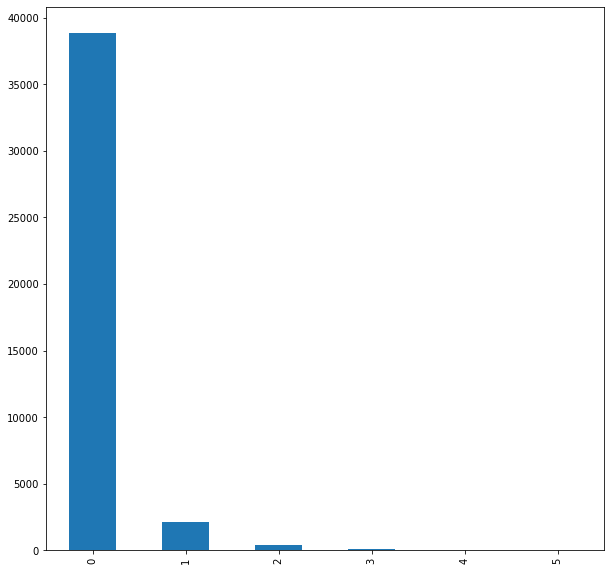

In [57]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Landline/wireless telephones`

In [58]:
y = income_df['Number of Landline/wireless telephones']
y.value_counts()

0    39302
1     2070
2       96
3       48
4       28
Name: Number of Landline/wireless telephones, dtype: int64

<AxesSubplot:>

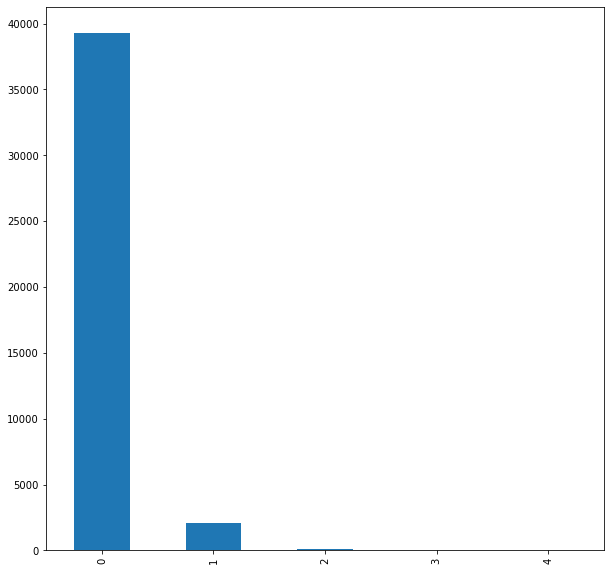

In [59]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Cellular phone`

In [60]:
y = income_df['Number of Cellular phone']
y.value_counts()

1     12484
2     10377
0      6939
3      5820
4      3281
5      1467
6       666
7       242
8       153
10       66
9        49
Name: Number of Cellular phone, dtype: int64

<AxesSubplot:>

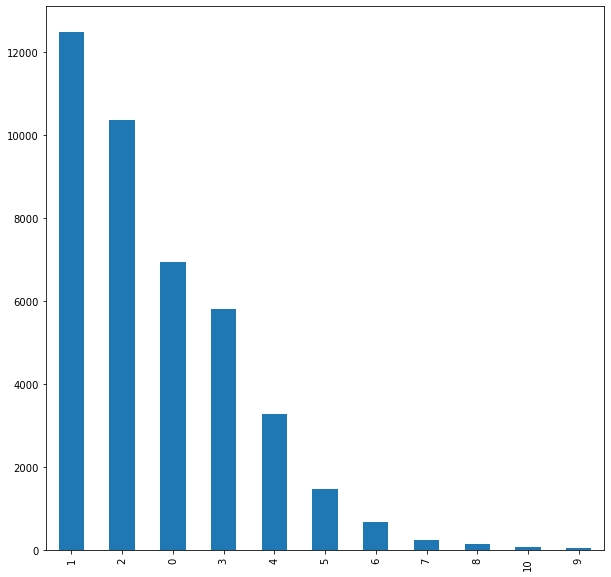

In [61]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Personal Computer`

In [62]:
y = income_df['Number of Personal Computer']
y.value_counts()

0    32988
1     5650
2     1836
3      667
4      271
5      112
6       20
Name: Number of Personal Computer, dtype: int64

<AxesSubplot:>

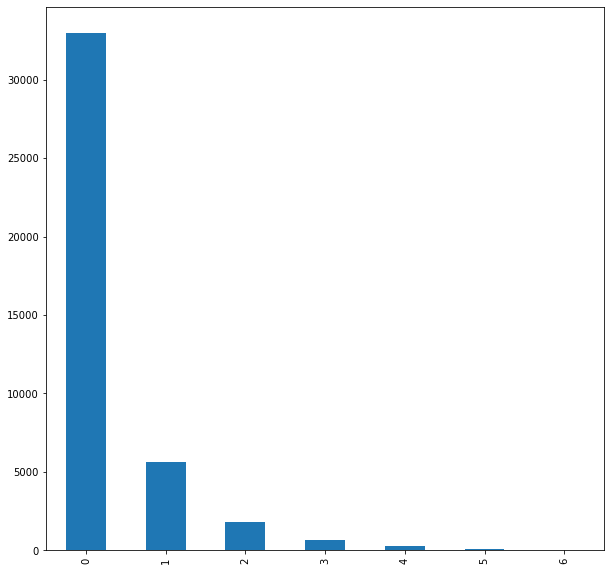

In [63]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Stove with Oven/Gas Range`

In [64]:
y = income_df['Number of Television']
y.value_counts()

1    27089
0    10717
2     2955
3      597
4      133
5       42
6       11
Name: Number of Television, dtype: int64

<AxesSubplot:>

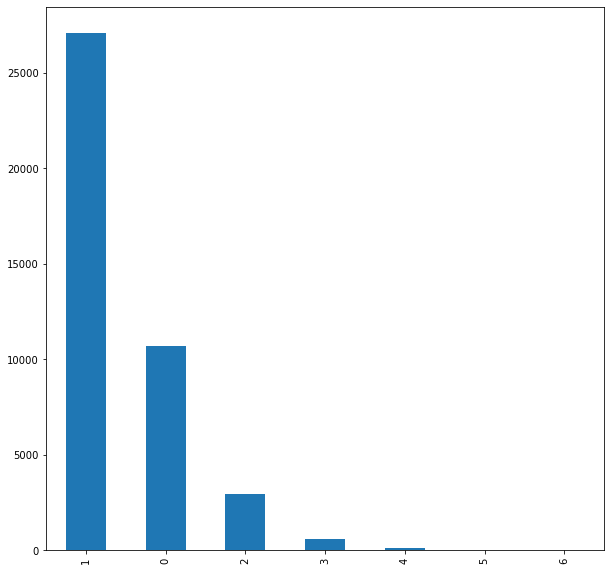

In [65]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Motorized Banca`

In [66]:
y = income_df['Number of Television']
y.value_counts()

1    27089
0    10717
2     2955
3      597
4      133
5       42
6       11
Name: Number of Television, dtype: int64

<AxesSubplot:>

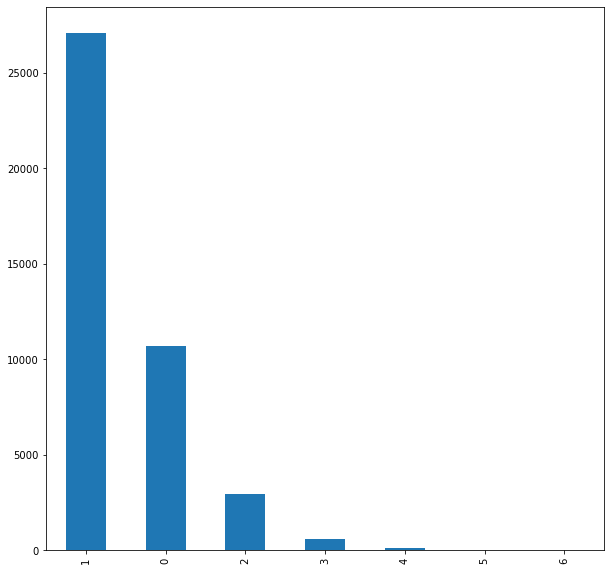

In [67]:
y.value_counts().plot.bar(figsize=(10,10))

### `House - Number of Motorcycle/Tricycle`

In [68]:
y = income_df['Number of Motorcycle/Tricycle']
y.value_counts()

0    31282
1     8811
2     1199
3      186
4       54
5       12
Name: Number of Motorcycle/Tricycle, dtype: int64

<AxesSubplot:>

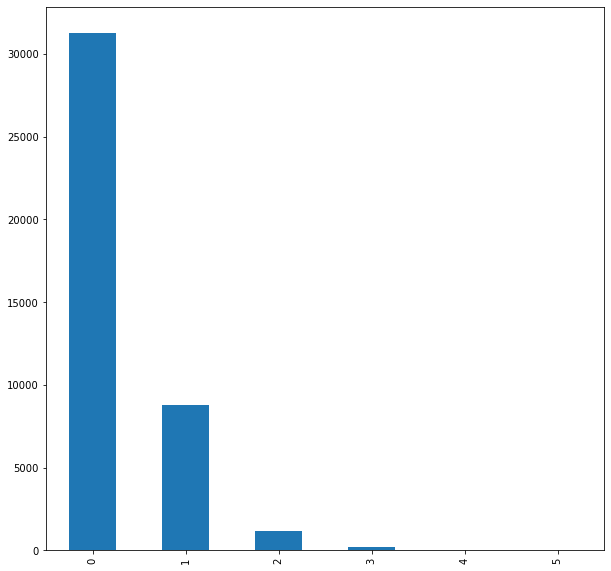

In [69]:
y.value_counts().plot.bar(figsize=(10,10))

## Data Cleaning
In this step, we will check if the dataset contains some errors or issues like null values, wrong encodings/spelling, duplicates, and inconsistencies. It is important to clean our data in order to avoid problems when performing analyses.

### Checking for Nulls

In [70]:
income_df.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

After performing null checking, we can see that there are null values in 2 variables like `Household Head Occupation` and `Household Head Class of Worker`. 

### Replacing of Nulls
It is shown that there is a significant number of observations with null values for both variables. Instead of removing them, we will replace them with a sentinent value of `Other` to identify these observations as they can still be used for analysis.

### `Household Head Occupation` variable

In [71]:
income_df['Household Head Occupation'].value_counts()

Farmhands and laborers                                                                 3478
Rice farmers                                                                           2849
General managers/managing proprietors in wholesale and retail trade                    2028
General managers/managing proprietors in transportation, storage and communications    1932
Corn farmers                                                                           1724
                                                                                       ... 
Petroleum and natural gas refining plant operators                                        1
Builders (traditional materials)                                                          1
Personal care and related workers, n. e. c.                                               1
Riggers and cable splicers                                                                1
Glass, ceramics and related plant operators n. e. c.                            

In [72]:
income_df['Household Head Occupation'].unique()

array(['General elementary education teaching professionals',
       'Transport conductors', 'Farmhands and laborers', 'Rice farmers',
       'General managers/managing proprietors in transportation, storage and communications',
       'Heavy truck and lorry drivers', nan, 'Hog raising farmers',
       'Vegetable farmers',
       'General managers/managing proprietors in wholesale and retail trade',
       'Stocks clerks', 'Justices', 'Other social science professionals',
       'Protective services workers n. e. c.', 'Secretaries',
       'Electronics mechanics and servicers',
       'Foresters and related scientists',
       'Shop salespersons and demonstrators',
       'College, university and higher education teaching professionals',
       'General managers/managing proprietors of restaurants and hotels',
       'Welders and flamecutters', 'Car, taxi and van drivers',
       'Motor vehicle mechanics and related trades workers',
       'Traditional chiefs and heads of villages', 'M

In [73]:
income_df['Household Head Occupation'] = income_df['Household Head Occupation'].replace(np.nan, 'Other')

### `Household Head Class of Worker` variable

In [74]:
income_df['Household Head Class of Worker'].value_counts()

Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: Household Head Class of Worker, dtype: int64

In [75]:
income_df['Household Head Class of Worker'] = income_df['Household Head Class of Worker'].replace(np.nan, 'Other')

In [76]:
income_df.isna().sum()

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

After performing another null checking, we can see there are no more null values found in all variables.

### Checking for Wrong Encodings, Duplicates, and Inconsistencies
Since all the null values are taken care of, we will now check the representations of the values in each categorical variable.

### `Region` variable

In [77]:
income_df['Region'].value_counts()

IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: Region, dtype: int64

After checking the `Region` variable, we can see that there are misrepresentations of whitespacing, wrong spelling, and inconsistency in the values such as ` ARMM`, `IX - Zasmboanga Peninsula`, and, `Caraga`, respectively, which are found to be dirty. We will replace these values with the appropriate representations.  

In [78]:
income_df['Region'] = income_df['Region'].replace(' ARMM', 'ARMM')
income_df['Region'] = income_df['Region'].replace('IX - Zasmboanga Peninsula', 'IX - Zamboanga Peninsula')
income_df['Region'] = income_df['Region'].replace('Caraga', 'XIII - Caraga')

In [79]:
income_df['Region'].value_counts()

IVA - CALABARZON            4162
NCR                         4130
III - Central Luzon         3237
VI - Western Visayas        2851
VII - Central Visayas       2541
V - Bicol Region            2472
XI - Davao Region           2446
I - Ilocos Region           2348
VIII - Eastern Visayas      2337
ARMM                        2248
II - Cagayan Valley         2219
XII - SOCCSKSARGEN          2122
X - Northern Mindanao       1887
IX - Zamboanga Peninsula    1788
XIII - Caraga               1782
CAR                         1725
IVB - MIMAROPA              1249
Name: Region, dtype: int64

### `Main Source of Income` variable

In [80]:
income_df['Main Source of Income'].value_counts()

Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main Source of Income, dtype: int64

There seems to be no misrepresentations in `Main Source of Income variable` upon checking.

### `Agricultural Household indicator` variable

In [81]:
income_df['Agricultural Household indicator'].value_counts()

0    28106
1     9018
2     4420
Name: Agricultural Household indicator, dtype: int64

There seems to be no misrepresentations in `Agricultural Household indicator` upon checking.

### `Household Head Sex` variable

In [82]:
income_df['Household Head Sex'].value_counts()

Male      32483
Female     9061
Name: Household Head Sex, dtype: int64

There seems to be no misrepresentations in `Household Head Sex variable` variable upon checking.

### `Household Head Marital Status` variable

In [83]:
income_df['Household Head Marital Status'].value_counts()

Married               31347
Widowed                6818
Single                 1942
Divorced/Separated     1425
Annulled                 11
Unknown                   1
Name: Household Head Marital Status, dtype: int64

We can see that there is a value `Unknown` as the very least observation compared to other values upon checking so we decided to drop its entire row from the dataset by replacing it with a null value then calling the `dropna` function. 

In [84]:
income_df['Household Head Marital Status'] = income_df['Household Head Marital Status'].replace('Unknown', np.nan) 

In [85]:
income_df = income_df.dropna()

### `Household Head Highest Grade Completed` variable

In [86]:
income_df['Household Head Highest Grade Completed'].value_counts()

High School Graduate                                                                                                                                                                                                   9627
Elementary Graduate                                                                                                                                                                                                    7640
Grade 4                                                                                                                                                                                                                2282
Grade 5                                                                                                                                                                                                                2123
Second Year High School                                                                                                 

We can see that there is a dirty duplicate value with letter casing issue surrounding the word `trades` between `Engineering and Engineering Trades Programs` and `Engineering and Engineering trades Programs` upon checking, so we decided to filter it by replacing the one with the lower case letter 't' with upper case 'T'.

In [87]:
income_df['Household Head Highest Grade Completed'] = income_df['Household Head Highest Grade Completed'].replace('Engineering and Engineering trades Programs', 'Engineering and Engineering Trades Programs')

In [88]:
income_df['Household Head Highest Grade Completed'].value_counts()

High School Graduate                                                                                                                                                                                                   9627
Elementary Graduate                                                                                                                                                                                                    7640
Grade 4                                                                                                                                                                                                                2282
Grade 5                                                                                                                                                                                                                2123
Second Year High School                                                                                                 

### `Household Head Job or Business Indicator`

In [89]:
income_df['Household Head Job or Business Indicator'].value_counts()

With Job/Business    34007
No Job/Business       7536
Name: Household Head Job or Business Indicator, dtype: int64

There seems to be no misrepresentations in `Household Head Job or Business Indicator` variable upon checking.

### `Household Head Occupation` variable

In [90]:
income_df['Household Head Occupation'].unique()

array(['General elementary education teaching professionals',
       'Transport conductors', 'Farmhands and laborers', 'Rice farmers',
       'General managers/managing proprietors in transportation, storage and communications',
       'Heavy truck and lorry drivers', 'Other', 'Hog raising farmers',
       'Vegetable farmers',
       'General managers/managing proprietors in wholesale and retail trade',
       'Stocks clerks', 'Justices', 'Other social science professionals',
       'Protective services workers n. e. c.', 'Secretaries',
       'Electronics mechanics and servicers',
       'Foresters and related scientists',
       'Shop salespersons and demonstrators',
       'College, university and higher education teaching professionals',
       'General managers/managing proprietors of restaurants and hotels',
       'Welders and flamecutters', 'Car, taxi and van drivers',
       'Motor vehicle mechanics and related trades workers',
       'Traditional chiefs and heads of villages'

There seems to be no misrepresentations in `Household Head Occupation` variable upon checking. This is the variable earlier that had significant number of observations with null values

### `Household Head Class of Worker` variable

In [91]:
income_df['Household Head Class of Worker'].value_counts()

Self-employed wihout any employee                             13765
Worked for private establishment                              13731
Other                                                          7536
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: Household Head Class of Worker, dtype: int64

There seems to be no misrepresentations in `Household Head Class of Worker` variable upon checking. This is also another variable earlier that had significant number of observations with null values

### `Type of Household` variable

In [92]:
income_df['Type of Household'].value_counts()

Single Family                             28444
Extended Family                           12932
Two or More Nonrelated Persons/Members      167
Name: Type of Household, dtype: int64

There seems to be no misrepresentations in `Type of Household` variable upon checking.

### `Type of Building/House` variable

In [93]:
income_df['Type of Building/House'].value_counts()

Single house                                   39069
Multi-unit residential                          1328
Duplex                                          1084
Commercial/industrial/agricultural building       51
Institutional living quarter                       9
Other building unit (e.g. cave, boat)              2
Name: Type of Building/House, dtype: int64

There seems to be no misrepresentations in `Type of Building/House` variable upon checking.

### `Type of Roof` variable

In [94]:
income_df['Type of Roof'].value_counts()

Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)    33342
Light material (cogon,nipa,anahaw)                                         5074
Mixed but predominantly strong materials                                   2002
Mixed but predominantly light materials                                     845
Salvaged/makeshift materials                                                212
Mixed but predominantly salvaged materials                                   56
Not Applicable                                                               12
Name: Type of Roof, dtype: int64

There seems to be no misrepresentations in `Type of Roof` variable upon checking.

### `Type of Walls` variable

In [95]:
income_df['Type of Walls'].value_counts()

Strong            27739
Light              8267
Quite Strong       3487
Very Light         1582
Salvaged            456
NOt applicable       12
Name: Type of Walls, dtype: int64

We can see that there is an inconsistency in the value `NOt applicable` so we decided to fix it following how it is represented in other variables.

### `Tenure Status` variable

In [96]:
income_df['Tenure Status'].value_counts()

Own or owner-like possession of house and lot        29540
Own house, rent-free lot with consent of owner        6165
Rent house/room including lot                         2203
Rent-free house and lot with consent of owner         2014
Own house, rent-free lot without consent of owner      995
Own house, rent lot                                    425
Rent-free house and lot without consent of owner       128
Not Applicable                                          73
Name: Tenure Status, dtype: int64

There seems to be no misrepresentations in `Tenure Status` variable upon checking.

### `Toilet Facilities` variable

In [97]:
income_df['Toilet Facilities'].value_counts()

Water-sealed, sewer septic tank, used exclusively by household    29161
Water-sealed, sewer septic tank, shared with other household       3694
Water-sealed, other depository, used exclusively by household      2343
Closed pit                                                         2273
None                                                               1580
Open pit                                                           1189
Water-sealed, other depository, shared with other household         950
Others                                                              353
Name: Toilet Facilities, dtype: int64

There seems to be no misrepresentations in `Toilet Facilities` variable upon checking.

### `Main Source of Water Supply` variable

In [98]:
income_df['Main Source of Water Supply'].value_counts()

Own use, faucet, community water system    16092
Shared, tubed/piped deep well               6242
Shared, faucet, community water system      4614
Own use, tubed/piped deep well              4587
Dug well                                    3876
Protected spring, river, stream, etc        2657
Tubed/piped shallow well                    1394
Peddler                                      851
Unprotected spring, river, stream, etc       607
Lake, river, rain and others                 496
Others                                       127
Name: Main Source of Water Supply, dtype: int64

There seems to be no misrepresentations in `Main Source of Water Supply` variable upon checking.

## Feature Extraction

### Getting Households with and without Minors

The dataframe does not have a column for households with minors. However it has columns for the number of minors (one for those that are younger than 5 years old and another one for those older than 5 years old but younger than 18 years old. The column for `Household with Minors (0-17yrs)` was created.

This column does not seek to total the number of minors per house but to indicate the presence of minors.

In [99]:
income_df['Household with Minors (0-17yrs)'] = income_df['Members with age less than 5 year old'] + income_df['Members with age 5 - 17 years old']
income_df['Household with Minors (0-17yrs)'] = income_df['Household with Minors (0-17yrs)'].where(income_df['Household with Minors (0-17yrs)'] == 0, 1)

The number of minors from the two aforementioned columns were added together. At this step, the column `Household with Minors (0-17yrs)` had the number of minors in each household. To turn this column into an indicator of the presence of minors in a household, non-zero values present within `Household with Minors (0-17yrs)` were turned into a `1`. A value of `0` in the column would indicate that there are no minors within a house.

In [100]:
income_df['Household with Minors (0-17yrs)'].value_counts()

1    30060
0    11483
Name: Household with Minors (0-17yrs), dtype: int64

The results of this feature extraction is shown above.

# Data Visualization and Analysis

### Average Total Household Incomes Between Rural and Urban Households

#### Get a Sample

Here, we will get a total of **100** samples for this since we will be comparing the `total household income` of both `urban` (50) and `rural` (50) households.

In [122]:
n = 50 # sample size
income_urban_sample = income_df[income_df['Region'] == "NCR"].sample(n, random_state = 1)
income_rural_sample = income_df[income_df['Region'] != "NCR"].sample(n, random_state = 1)

frames = [income_urban_sample, income_rural_sample]
income_sample_df = pd.concat(frames)
income_sample_df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household with Minors (0-17yrs),Members that are minors
37038,371690,NCR,130204,Wage/Salaries,2,22630,15288,20499,14400,3632,...,0,0,0,4,0,0,0,0,1,1
38804,256386,NCR,116040,Wage/Salaries,2,24316,19140,11042,11051,2670,...,0,0,0,1,0,0,0,0,1,1
39028,100575,NCR,32928,Other sources of Income,2,8274,3840,2273,1301,620,...,0,0,0,1,0,0,0,0,0,0
20774,893492,NCR,217123,Wage/Salaries,0,27519,16618,39102,13353,10960,...,1,0,1,6,1,0,0,0,0,0
36799,398546,NCR,175908,Wage/Salaries,2,32304,14023,26469,10558,5985,...,0,0,0,2,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29436,477254,NaN,106719,Wage/Salaries,0,16006,11960,8060,8684,1505,...,0,0,0,4,1,0,0,0,1,1
11823,53048,XI - Davao Region,29919,Enterpreneurial Activities,1,11769,0,2066,5750,1331,...,0,0,0,0,0,0,0,0,1,1
13347,125839,I - Ilocos Region,69073,Other sources of Income,1,15781,9740,10745,10535,2960,...,0,0,0,1,0,0,0,0,1,1
10103,588398,VII - Central Visayas,119580,Enterpreneurial Activities,0,21525,15912,34239,24152,6337,...,2,4,1,3,1,1,0,0,0,0


We will add a column for the `Classification` of each region, which is either `Urban` or `Rural`.

In [123]:
income_sample_df["Classification"] = np.where(income_sample_df["Region"] == "NCR", "Urban", "Rural")
income_sample_df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household with Minors (0-17yrs),Members that are minors,Classification
37038,371690,NCR,130204,Wage/Salaries,2,22630,15288,20499,14400,3632,...,0,0,4,0,0,0,0,1,1,Urban
38804,256386,NCR,116040,Wage/Salaries,2,24316,19140,11042,11051,2670,...,0,0,1,0,0,0,0,1,1,Urban
39028,100575,NCR,32928,Other sources of Income,2,8274,3840,2273,1301,620,...,0,0,1,0,0,0,0,0,0,Urban
20774,893492,NCR,217123,Wage/Salaries,0,27519,16618,39102,13353,10960,...,0,1,6,1,0,0,0,0,0,Urban
36799,398546,NCR,175908,Wage/Salaries,2,32304,14023,26469,10558,5985,...,0,0,2,1,0,0,0,1,2,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29436,477254,NaN,106719,Wage/Salaries,0,16006,11960,8060,8684,1505,...,0,0,4,1,0,0,0,1,1,Rural
11823,53048,XI - Davao Region,29919,Enterpreneurial Activities,1,11769,0,2066,5750,1331,...,0,0,0,0,0,0,0,1,1,Rural
13347,125839,I - Ilocos Region,69073,Other sources of Income,1,15781,9740,10745,10535,2960,...,0,0,1,0,0,0,0,1,1,Rural
10103,588398,VII - Central Visayas,119580,Enterpreneurial Activities,0,21525,15912,34239,24152,6337,...,4,1,3,1,1,0,0,0,0,Rural


Based on the `Classification` variable, we will get the `Total Household Income` variable.

The boxplot below compares the two groups:

Rural         AxesSubplot(0.1,0.15;0.363636x0.75)
Urban    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

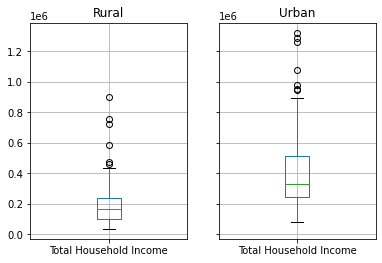

In [124]:
income_sample_df.groupby(["Classification"]).boxplot(column = "Total Household Income")

Based from the boxplot alone, it may seem that `rural` households tend to have less household income than `urban` ones. (claim)

But is the difference really that significant? 
In order to make sure, a hypothesis test will be conducted.

#### Hypothesis Test

Now, let us only focus on the `Total Household Income` variable. Let us compute the summary statistics for
this variable.

In [127]:
agg = income_sample_df.groupby("Classification").agg({"Total Household Income": ["mean", "std"]})
sample_urban_mean = agg.loc["Urban"].loc["Total Household Income"].loc["mean"]
sample_rural_mean = agg.loc["Rural"].loc["Total Household Income"].loc["mean"]

print('Sample urban mean = {:.2f}'.format(sample_urban_mean))
print('Sample rural mean = {:.2f}'.format(sample_rural_mean))

diff = abs(sample_urban_mean - sample_rural_mean)
print('Difference = {:.2f}'.format(diff))

Sample urban mean = 439553.82
Sample rural mean = 221589.72
Difference = 217964.10


We set up our hypotheses as follows:
𝐻0  (null hypothesis): The true difference is 0.
𝐻𝐴  (alternative hypothesis): The true difference is not 0.

Now, we can use a *t*-test to compare the two means from the unpaired groups. This function
assumes that the null hypothesis is that the difference between the two means is 0, while the alternative hypothesis is that the diference between them is not 0. We set the `equal_var` parameter to `False` because we don't want to assume that the population has equal variances.

In [129]:
st.ttest_ind(income_sample_df[income_sample_df["Classification"] == "Urban"]["Total Household Income"],
          income_sample_df[income_sample_df["Classification"] == "Rural"]["Total Household Income"],
          equal_var = False)

Ttest_indResult(statistic=4.163232276631239, pvalue=7.875887830900579e-05)

Under a significance level of 5%, the decision is to reject the null hypothesis. This means that there is sufficient evidence to support that there is a statistically significant difference between the `total household incomes` of `urban` and `rural` households.

### Educational Attainment of Household Head and Location

#### Get a Sample

Here, we will get a total of **2000** samples for this since we will be using the `Household Head Highest Grade Completed` of both `urban` (1000) and `rural` (1000) households.

In [131]:
n = 1000 # sample size
income_urban_sample2 = income_df[income_df['Region'] == "NCR"].sample(n, random_state = 1)
income_rural_sample2 = income_df[income_df['Region'] != "NCR"].sample(n, random_state = 1)

frames = [income_urban_sample2, income_rural_sample2]
income_sample_df2 = pd.concat(frames)
income_sample_df2


,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household with Minors (0-17yrs),Members that are minors
37038,371690,NCR,130204,Wage/Salaries,2,22630,15288,20499,14400,3632,...,0,0,0,4,0,0,0,0,1,1
38804,256386,NCR,116040,Wage/Salaries,2,24316,19140,11042,11051,2670,...,0,0,0,1,0,0,0,0,1,1
39028,100575,NCR,32928,Other sources of Income,2,8274,3840,2273,1301,620,...,0,0,0,1,0,0,0,0,0,0
20774,893492,NCR,217123,Wage/Salaries,0,27519,16618,39102,13353,10960,...,1,0,1,6,1,0,0,0,0,0
36799,398546,NCR,175908,Wage/Salaries,2,32304,14023,26469,10558,5985,...,0,0,0,2,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,199920,VI - Western Visayas,115506,Wage/Salaries,0,40904,36114,19498,10533,3400,...,0,0,0,4,0,0,0,0,1,2
1154,96002,XIII - Caraga,46373,Other sources of Income,0,22672,12480,2740,7790,890,...,0,0,0,1,0,0,0,0,0,0
17238,139164,NaN,78881,Wage/Salaries,0,19190,7961,11522,6205,1463,...,0,0,0,2,0,0,0,1,0,0
35820,74711,IX - Zamboanga Peninsula,58256,Enterpreneurial Activities,1,32699,0,510,5682,1042,...,0,0,0,0,0,0,0,0,1,7


We will now us the `where` function of numpy to determine the household classification of the sample data.

In [132]:
income_sample_df2["Household Classification"] = np.where(income_sample_df2["Region"] == "NCR", "Urban", "Rural")
income_sample_df2

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household with Minors (0-17yrs),Members that are minors,Household Classification
37038,371690,NCR,130204,Wage/Salaries,2,22630,15288,20499,14400,3632,...,0,0,4,0,0,0,0,1,1,Urban
38804,256386,NCR,116040,Wage/Salaries,2,24316,19140,11042,11051,2670,...,0,0,1,0,0,0,0,1,1,Urban
39028,100575,NCR,32928,Other sources of Income,2,8274,3840,2273,1301,620,...,0,0,1,0,0,0,0,0,0,Urban
20774,893492,NCR,217123,Wage/Salaries,0,27519,16618,39102,13353,10960,...,0,1,6,1,0,0,0,0,0,Urban
36799,398546,NCR,175908,Wage/Salaries,2,32304,14023,26469,10558,5985,...,0,0,2,1,0,0,0,1,2,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,199920,VI - Western Visayas,115506,Wage/Salaries,0,40904,36114,19498,10533,3400,...,0,0,4,0,0,0,0,1,2,Rural
1154,96002,XIII - Caraga,46373,Other sources of Income,0,22672,12480,2740,7790,890,...,0,0,1,0,0,0,0,0,0,Rural
17238,139164,NaN,78881,Wage/Salaries,0,19190,7961,11522,6205,1463,...,0,0,2,0,0,0,1,0,0,Rural
35820,74711,IX - Zamboanga Peninsula,58256,Enterpreneurial Activities,1,32699,0,510,5682,1042,...,0,0,0,0,0,0,0,1,7,Rural


After classifying the households based on their region, we will also classify the educational attainment of the household head, the classification are as follows:
- `Preschool` - The household head has at least attended/finished preschool education.
- `Elementary` - The household head has at least attended/finished elementary education.
- `Highschool` - The household head has at least attended/finished secondary education.
- `College` - The household head has at least attended/finished college.
- `Postgraduate` - The household head has at least attended/finished graduate school.
- `Other Programs` - The household head has at least attended/finished other programs such as technical programs, art programs, vocational programs, etc.

We will also use a function called `classify_education` to identify which classification the household head belongs to.

In [133]:
def classify_education(string):
    if "Grade" in string or "Elementary" in string:
        return "Elementary"
    elif "High School" in string:
        return "High School"
    elif "College" in string or "Post Secondary" in string:
        return "College"
    elif "Program" in string:
        return "Other Programs"
    elif "Preschool" in string:
        return "Preschool"
    elif "Baccalaureate" in string:
        return "Postgraduate"
    else:
        return "No Grade Completed"

income_sample_df2["Household Head Highest Grade Completed Classification"] = income_sample_df2["Household Head Highest Grade Completed"].apply(classify_education)
income_sample_df2.loc[:,["Household Head Highest Grade Completed", "Household Head Highest Grade Completed Classification"]]



,Household Head Highest Grade Completed,Household Head Highest Grade Completed Classification
37038,Security Services Programs,Other Programs
38804,High School Graduate,High School
39028,Computing/Information Technology Programs,Other Programs
20774,Engineering and Engineering Trades Programs,Other Programs
36799,Personal Services Programs,Other Programs
...,...,...
1993,First Year Post Secondary,College
1154,Elementary Graduate,Elementary
17238,High School Graduate,High School
35820,Grade 1,Elementary


After the classifications, we will now count the number of people in each group for each `Household Classification`.

In [135]:
counts = income_sample_df2.groupby("Household Classification")["Household Head Highest Grade Completed Classification"].value_counts()
counts

Household Classification  Household Head Highest Grade Completed Classification
Rural                     Elementary                                               477
                          High School                                              323
                          Other Programs                                           120
                          College                                                   73
                          Postgraduate                                               6
                          Preschool                                                  1
Urban                     High School                                              469
                          Other Programs                                           234
                          Elementary                                               147
                          College                                                  144
                          Postgraduate            

As you can see, it seems that a lot of household heads in the rural regions attained at least an elementary education compared to urban regions where there are many household heads who have attained at least an secondary education. But aside from this observation, we should ask ourselves if the difference between two groups is statiscally significant.

With that said, we will use a Chi-square test to determine if there is a difference between the two groups based on the sample the we got.

Our first step for this test would be to convert our counts into a table format.

In [136]:
# Convert to table

table = pd.DataFrame([counts["Rural"], counts["Urban"]], index=["Rural", "Urban"]).transpose()
table["Urban"] = table["Urban"].fillna(0).apply(np.int64)
table["Rural"] = table["Rural"].apply(np.int64)
table

,Rural,Urban
Household Head Highest Grade Completed Classification,,
Elementary,477,147
High School,323,469
Other Programs,120,234
College,73,144
Postgraduate,6,6
Preschool,1,0


We will now then use the `chi2_contigency` function fron `scipy` to perform a Chi-square test on this sample. By using the function we will be able to get the follow:
- The test statistic.
- The $p$-value of the test.
- Degrees of freedom of the test.

Compute the $p$-value.

In [138]:
st.chi2_contingency(table)

(262.3756513366956,
 1.2134209956031353e-54,
 5,
 array([[312. , 312. ],
        [396. , 396. ],
        [177. , 177. ],
        [108.5, 108.5],
        [  6. ,   6. ],
        [  0.5,   0.5]]))

Based on the results of the chi2_contigency function, since the  𝑝 -value is < 0.05, we can conclude that there is significant difference on the educational attainment of the household heads between urban households and rural households.

### Average Food Expenditure of Household by Region

To answer this question, the variables of interest are: <br>
- `Total Food Expenditure`<br>
- `Region`<br>

We can select a specific column from a `DataFrame` as a `Series` by using square brackets. For example, we can get the total food expenditures of the households involved by accessing the `Total Food Expenditure` column.

In [101]:
income_df["Total Food Expenditure"]

0        117848
1         67766
2         61609
3         78189
4         94625
          ...  
41539     44875
41540     31157
41541     45882
41542     81416
41543     78195
Name: Total Food Expenditure, Length: 41543, dtype: int64

In order to get an understanding of numerical values in the dataset, a histogram may be used. Let us try to use one to visualize the total food expenditures across all households in the dataset. To do this, we call the `hist` function of the `DataFrame` which in turn calls the appropriate matplotlib function.

We also call the show function to display the graph.

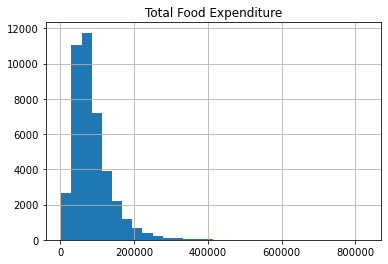

In [102]:
income_df.hist("Total Food Expenditure", bins = 30) 
plt.show()

As you can see, the `Total Food Expenditure` for all households is positively skewed. This means that most of the values are clustered on the left hand side of the histogram.

How about we try to investigate the total food expenditures for households in NCR only? In order to do this, we have to consider **only the observations in which the region is NCR**.

In [104]:
income_df[income_df["Region"] == "NCR"]

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household with Minors (0-17yrs)
20475,623738,NCR,133762,Wage/Salaries,0,21969,13000,15192,10438,3690,...,1,1,0,1,3,1,1,0,0,0
20476,301900,NCR,109815,Wage/Salaries,0,22158,17550,14679,4260,3420,...,1,0,0,0,2,1,0,0,0,0
20477,169200,NCR,47653,Other sources of Income,0,13260,8450,3370,1080,120,...,1,0,0,0,2,1,0,0,0,0
20478,428200,NCR,179808,Wage/Salaries,0,20996,12350,24016,7920,3550,...,1,1,0,0,2,1,0,0,0,1
20479,283100,NCR,123872,Other sources of Income,0,17060,13350,18478,13320,3830,...,1,0,0,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40206,396152,NCR,151505,Other sources of Income,2,39398,29860,25700,42725,1520,...,1,0,0,0,3,0,0,0,0,1
40207,369677,NCR,129728,Other sources of Income,2,27567,10350,24396,11540,3005,...,1,0,0,0,2,2,0,0,1,1
40208,358172,NCR,95769,Wage/Salaries,2,28797,19940,13270,11043,3050,...,1,0,0,0,3,0,0,0,0,0
40209,287135,NCR,88197,Wage/Salaries,2,25695,15385,6810,3678,1315,...,0,0,0,0,2,0,0,0,0,1


As you can see, the above query resulted into a new `DataFrame` containing only the households whose `Region` is "NCR". However, for convenience, it is better to assign this new `DataFrame` to a new variable.

In [105]:
households_in_ncr_df = income_df[income_df["Region"] == "NCR"]

Once we have loaded our reduced `DataFrame`, let us plot a histogram based on total food expenditures of households in NCR.

array([[<AxesSubplot:title={'center':'Total Food Expenditure'}>]],
      dtype=object)

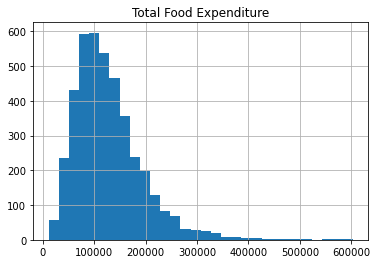

In [106]:
households_in_ncr_df.hist("Total Food Expenditure", bins = 30)

For households in NCR, the `Total Food Expenditure` for all households is positively skewed as well.

In order to get the average of the `Total Food Expenditure` of all households in NCR, we will make use of the `agg` function or the aggregate function. For this function, we pass a dictionary where the key is a column name and the corresponding value is a list of functions to be applied to that column. For this case, we want to get the mean of the `Total Food Expenditure` column.

In [109]:
households_in_ncr_df.agg({"Total Food Expenditure": ["mean"]})

,Total Food Expenditure
mean,127093.40712


As you can see, the average `Total Food Expenditure` of households in NCR is **Php 127093.41**

### Average Total Income of Households with at Least One Minor

For this question, the variables of interest are:
    - Members with age less than 5 year old
    - Members with age 5-17 years old
    - Total Household Income

For this notebook, a minor would be defined as someone who is **below 18 years old**. Since there are 2 variables that make up members with age of 0 - 17 years old, it is better to make a new column combining the two variables.

In [111]:
income_df["Members that are minors"] = income_df["Members with age less than 5 year old"] + income_df["Members with age 5 - 17 years old"]

This code basically combines the values of members with age less than 5 years old and members with age 5 - 17 years old into a new column in the dataset. We called it `Members that are minors`. We then define a new `DataFrame` containing all households with at least one minor.

In [112]:
households_w_minor_df = income_df[(income_df["Members that are minors"] > 0)]
households_w_minor_df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household with Minors (0-17yrs),Members that are minors
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,0,0,0,2,1,0,0,1,1,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,0,0,3,1,0,0,2,1,1
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,1,4
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,1,0,0,0,0,1,3
6,198621,CAR,104644,Wage/Salaries,0,40992,36312,12968,12310,2565,...,0,0,0,2,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41538,130636,XII - SOCCSKSARGEN,81469,Wage/Salaries,2,28563,23457,4728,12496,3508,...,0,0,0,3,0,1,0,0,1,2
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,1,0,0,0,0,1,2
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,3,0,0,0,0,1,3
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,2,0,0,0,0,1,3


Now we plot the `Total Household Income` of all households with at least one minor in a histogram.

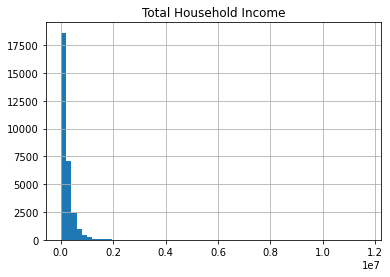

In [114]:
households_w_minor_df.hist("Total Household Income", bins = 60)
plt.show()

As you can see, the `Total Household Income` of all households with at least one minor is positively skewed.

We then find the mean of the `Total Household Income` by once again using the aggregate (`agg`) function.

In [116]:
households_w_minor_df.agg({"Total Household Income": ["mean"]})

,Total Household Income
mean,247928.404757


Based on the value that the aggregate function returned, the average `Total Household Income` for all households with at least one minor is **Php 247928.40**.

### Average Expenditures on Clothing, Footwear, and Other Wear by Region

Lastly, let us try to find which region spends the most, on average, on clothing, footwear, and other wear expenditures. 

The variables of interest are:
    - Region
    - Clothing, Footwear and Other Wear Expenditure

Before working on the question, let us first sort the regions starting with those that have no region number (ARMM, CAR, and NCR), followed by ones with a region number. A function called `CategoricalDtype` will be used to sort values in a certain column in a certain manner.

In [118]:
region_order = pd.CategoricalDtype(
    ["ARMM", "CAR", "NCR", "I - Ilocos Region", "II - Cagayan Valley", "III - Central Luzon", "IVA - Calabarzon", "IVB - MIMAROPA", "V - Bicol Region",
     "VI - Western Visayas", "VII - Central Visayas", "VIII - Eastern Visayas", "IX - Zamboanga Peninsula", "X - Northern Mindanao", "XI - Davao Region",
     "XII - Soccsksargen", "XIII - Caraga"],
    ordered = True
)

income_df["Region"] = income_df["Region"].astype(region_order)

There are cases where we want to form groups in datasets. In order to determine the region that spends the most on average clothing, footwear, and other wear expenditures. To do this, we can use the groupby function. This function groups the dataset based on the value of each observation for that function. We then call the aggregate function in order to perform aggregation per group.

In [119]:
income_df.groupby("Region")
income_df.groupby("Region").agg({"Clothing, Footwear and Other Wear Expenditure": ["mean"]})

,"Clothing, Footwear and Other Wear Expenditure"
,mean
Region,
ARMM,2719.066281
CAR,5720.245797
NCR,6978.329620
I - Ilocos Region,5185.354344
II - Cagayan Valley,3758.884633
III - Central Luzon,5635.670992
IVA - Calabarzon,NaN
IVB - MIMAROPA,4989.000000


Based on the table presented above, the means of clothing expenditures are shown per region. 

We can also visualize the clothing expenditures by using a side-by-side boxplot using the `boxplot` function of matplotlib.

<AxesSubplot:title={'center':'Clothing, Footwear and Other Wear Expenditure'}, xlabel='Region'>

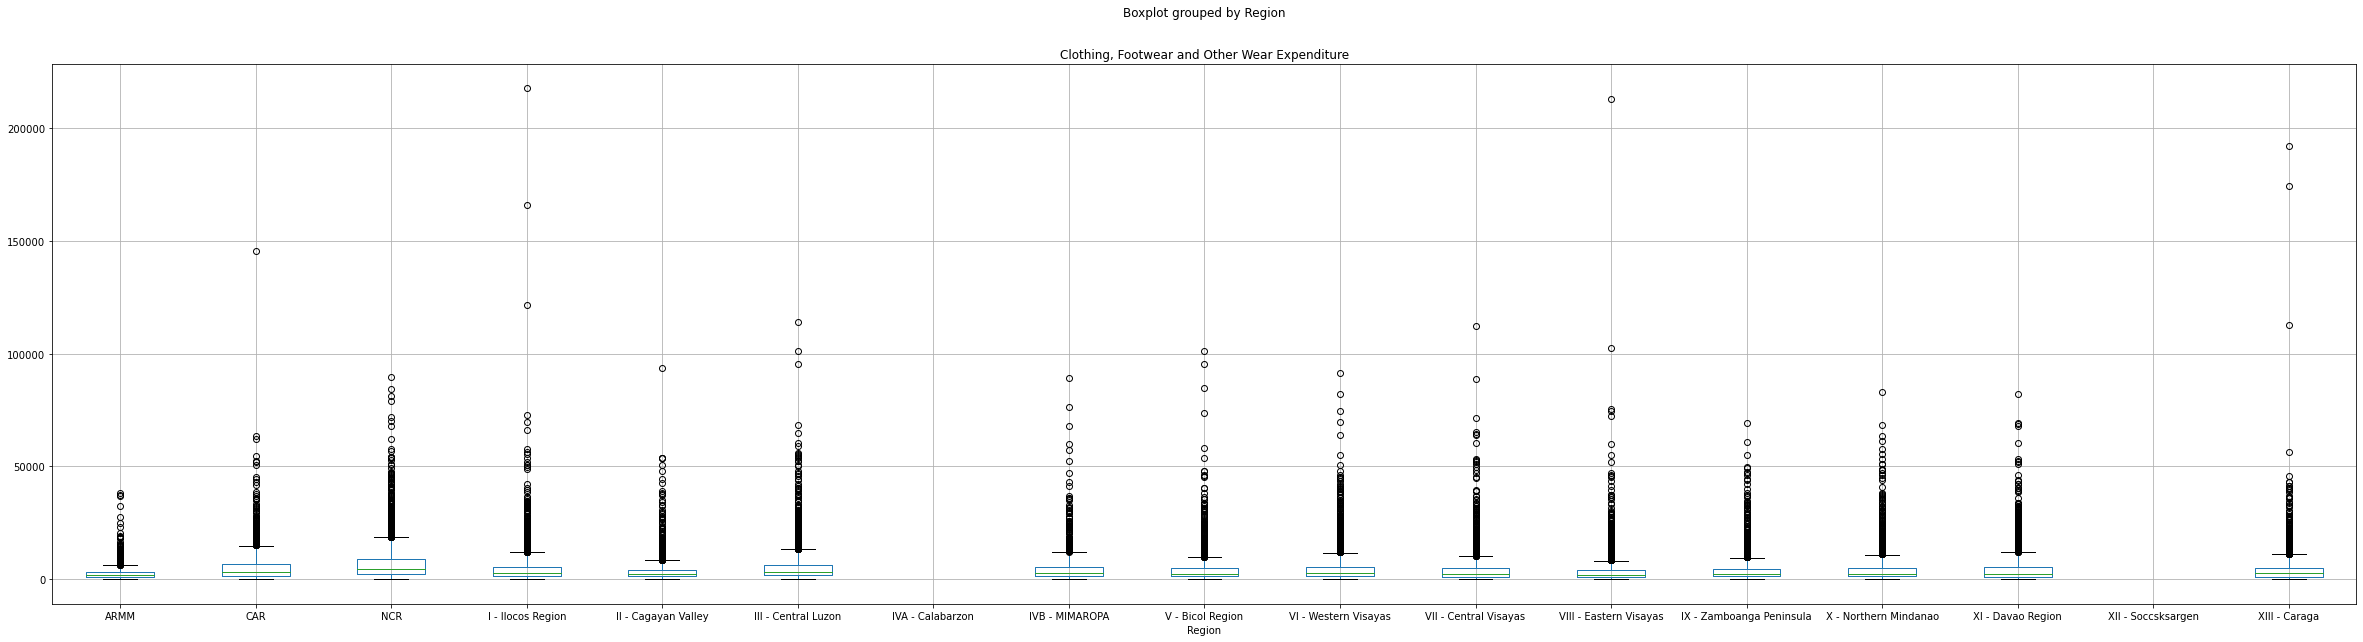

In [120]:
income_df.boxplot("Clothing, Footwear and Other Wear Expenditure", by = "Region", figsize = (40, 10))

The boxplot above shows that all our columns have outliers which are outside of the inter-quartile range. 

All we have to do now is to sort the values so that the first row will show the region with the most average expenditures on clothing, footwear, and other wear. To do this, the `sort_values` function will be used. It accepts a variable to be sorted as its parameter. In this case, since we are looking for the region with the most average expenditures on clothing, we will be sorting the mean in descending order.

In [121]:
income_df.groupby("Region").agg({"Clothing, Footwear and Other Wear Expenditure": ["mean"]}).sort_values(("Clothing, Footwear and Other Wear Expenditure", "mean"), ascending = False)

,"Clothing, Footwear and Other Wear Expenditure"
,mean
Region,
NCR,6978.329620
CAR,5720.245797
III - Central Luzon,5635.670992
I - Ilocos Region,5185.354344
IVB - MIMAROPA,4989.000000
XIII - Caraga,4888.465208
VI - Western Visayas,4820.843914
X - Northern Mindanao,4813.401166


As you can see, NCR spends the most on average on clothing, footwear, and other wear expenditures with an average of **Php 6978.33**.

## Summary of Findings

INSERT SUMMARY

## Recommendations

## References

- American Psychological Association. (2015a). APA Dictionary of Psychology (2nd ed.).
- American Psychological Association (2015b). Measuring Socioeconomic Status and Subjective Social Status. Https://Www.apa.org. https://www.apa.org/pi/ses/resources/class/measuring-status/#:~:text=These%20measures%20generally%20ask%20participants,wealth%2C%20and%20SES%20composite%20scores.
- Francis Paul Flores. (2017). Filipino Family Income and Expenditure. Kaggle.com. https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure
- Philippine Statistics Authority (2018). 2018 Family Income and Expenditure Survey.
